In [1]:
from itertools import islice

#https://stackoverflow.com/questions/5832856/how-to-read-file-n-lines-at-a-time-in-python
file='small_file.fastq'

In [2]:
len(file)

16

In [3]:
#https://stackoverflow.com/questions/5832856/how-to-read-file-n-lines-at-a-time-in-python
file='small_file.fastq'
len_file=40
print(int(len_file//4)-1)
with open(file, 'r') as infile:
    for i in range (0,int(len_file//4)-1):
        print('NUM',i)
        lines_gen = islice(infile, i*4, i*4+3)
        print(lines_gen)
        for line in lines_gen:
            print (line)


9
NUM 0
@v300041909_run25L4C001R0020000098/1

AGTATGTCGTGCCAGCAGCCGCGGTAATACGTAGGTGGCAAGCGTTATCCGGATTTATTGGGCGTAAAGAGAGTGCAGGCGGTTTTCTAAGTCTGATGTGGAAGCCTTCGGCTTAACCGGGGAAGGGCATCGGAAACTGGATAACTTGGG

+

NUM 1
GEDGCCGFGFF<FFFFFFDFEAFFEBFGGFF@DFEFFDFFFGFGEE<F;GFF>>FF9?FFFCFFEGFFGEF;GCFFEFDF@F<CFFFFFFFFFGB.EGEF=EFGEFBEFB&EFFFCEFDDEFEAF=GDFE?FF=E<D@FF0FAFGGFE'F

@v300041909_run25L4C001R0020001208/1

GTCTTATGGTGCCAGCCGCCGCGGTAATACGTAGGTGGCAAGCGTTATCCGGATTTATTGGGCGTAAAGAGAGTGCAGGCGGTTTTCTAAGTCTGATGTGAAAGCCTTCGGCTTAACCGGAGAAGTGCATCGGAAACTGGATAACTTGGG

NUM 2
+

GFGGFFGGGFEFFFFGDFGFDGGFFCGBGGGFGEG*FFFFFGCF?GFFFGFF=FFFGFGG:FFFAGAFFFF<F5FGFFGGFF;FFFGF=FFFFFF1FCFFEFCFFGFCF@FFFGFEFG>:CGE+F,FFEG<CB3E3F?BF3F5GF=GF(F

@v300041909_run25L4C001R0020002938/1

NUM 3
ACCACAATGTGCCAGCCGCCGCGGTAATACGTAGGTGGCAAGCGTTATCCGGATTTATTGGGCGTAAAGAGAGTGCAGGCGGTTTTCTAAGTCTGATGTGAAAGCCTTCGGCTTAACCGGAGAAGTGCATCGGAAACTGGATAACTTGAG

+

FF@F?FFGFFFFFDFFFCFGFFGFFFFFFF>EFF<:GDFFFFFF@EGGFGFF9FFFFFFFFFFDCFFFGEF:E>@F;FF>FGD?F>GF>FF

In [4]:
#DOWNSAMPLING

#input1 = '/home/irinab/Desktop/16s/downsampling/125_5ng/v300056283_run32_L04_125_1.fq.gz'
#input2 = '/home/irinab/Desktop/16s/downsampling/125_5ng/v300056283_run32_L04_125_2.fq.gz'

#input1 = '/home/irinab/Desktop/16s/downsampling/126_1ng/v300056283_run32_L04_126_1.fq.gz'
#input2 = '/home/irinab/Desktop/16s/downsampling/126_1ng/v300056283_run32_L04_126_2.fq.gz'

input1 = '/home/irinab/Desktop/16s/downsampling/127_0,2ng/v300056283_run32_L04_127_1.fq.gz'
input2 = '/home/irinab/Desktop/16s/downsampling/127_0,2ng/v300056283_run32_L04_127_2.fq.gz'

#input1 = '/home/irinab/Desktop/16s/downsampling/128_NTC/v300056283_run32_L04_128_1.fq.gz'
#input2 = '/home/irinab/Desktop/16s/downsampling/128_NTC/v300056283_run32_L04_128_2.fq.gz'


number_of_reads=400000

output1=input1[:-6]+'_'+str(number_of_reads)+'_reads.fq'
output2=input2[:-6]+'_'+str(number_of_reads)+'_reads.fq'

print('seqtk sample -s100',input1,number_of_reads,'>', output1)
print('seqtk sample -s100',input2,number_of_reads,'>', output2)

seqtk sample -s100 /home/irinab/Desktop/16s/downsampling/127_0,2ng/v300056283_run32_L04_127_1.fq.gz 400000 > /home/irinab/Desktop/16s/downsampling/127_0,2ng/v300056283_run32_L04_127_1_400000_reads.fq
seqtk sample -s100 /home/irinab/Desktop/16s/downsampling/127_0,2ng/v300056283_run32_L04_127_2.fq.gz 400000 > /home/irinab/Desktop/16s/downsampling/127_0,2ng/v300056283_run32_L04_127_2_400000_reads.fq


In [88]:
#FILTRATION

#поиск праймера 1
def primer_mism_1(read1):
    #print(len(read1))
    pr1='GTGYCAGCMGCCGCGGTAA'
    mism=-2
    for i in range (0,19):
        if read1[i]!=pr1[i]:
            mism+=1
    #print(mism)
    if not (read1[3]=='T' or read1[3]=='C'):
        mism+=1
    if not (read1[8]=='A' or read1[3]=='C'):
        mism+=1  
    #print(read1,mism)
    return mism
        #print (i)
    
#поиск праймера 2
def primer_mism_2(read2):
    pr2='GGACTACNVGGGTWTCTAAT'
    mism=-3
    for i in range (0,20):
        if read2[i]!=pr2[i]:
            mism+=1
    #print(mism)
    if read2[8]=='T':
        mism+=1
    if not (read2[13]=='A' or read2[13]=='T'):
        mism+=1  
    #print(read1,mism)
    return mism
        #print (i)

In [89]:
filtr_input_1 = output1#'/home/irinab/Desktop/16s/downsampling/125_5ng/v300056283_run32_L04_125_1_250_reads.fq'#
filtr_input_2 = output2#'/home/irinab/Desktop/16s/downsampling/125_5ng/v300056283_run32_L04_125_2_250_reads.fq'#

filtr_output_1 = filtr_input_1[:-3]+'_filtered.fq'
filtr_output_2 = filtr_input_2[:-3]+'_filtered.fq'

In [90]:
number_of_good_reads = 0
number_of_bed_reads = 0
number_of_good_reads_1=0
number_of_good_reads_2=0

number_of_reads_filtering=number_of_reads
number_of_max_mismatches=3

with open(filtr_input_1) as f1, open(filtr_input_2) as f2:
    content1 = f1.readlines()
    content2 = f2.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content1 = [x.strip() for x in content1]
content2 = [x.strip() for x in content2]

print('GTGYCAGCMGCCGCGGTAA','GGACTACNVGGGTWTCTAAT\n')

for i in range (0, number_of_reads_filtering):

    current_read1=content1[i*4:i*4+4]
    current_read2=content2[i*4:i*4+4]
    #print(i,current_read1,'\n\n', current_read2)
    current_primer1=current_read1[1][8:27]
    current_primer2=current_read2[1][8:28]
    #print(i,current_primer1, current_primer2)
    #print((primer_mism_1(current_primer1)),(primer_mism_2(current_primer2)))
    if (primer_mism_1(current_primer1)<=number_of_max_mismatches) and (primer_mism_2(current_primer2) <=number_of_max_mismatches):
        number_of_good_reads+=1
        f_out_1 = open(filtr_output_1, 'a')
        for item1 in current_read1:
            f_out_1.write(item1+'\n')
        f_out_1.close()
        f_out_2 = open(filtr_output_2, 'a')
        for item2 in current_read2:
            f_out_2.write(item2+'\n')
        f_out_2.close()
    else:
        number_of_bed_reads+=1
    if (primer_mism_1(current_primer1)<=number_of_max_mismatches): number_of_good_reads_1+=1
    if (primer_mism_2(current_primer2)<=number_of_max_mismatches): number_of_good_reads_2+=1
    #for item in current_read:
    #    print(item)
print(number_of_good_reads,number_of_bed_reads,'\n')
print('max permitted number of mismatches',number_of_max_mismatches)
print(100*number_of_good_reads_1/number_of_reads_filtering,'% good first reads')
print(100*number_of_good_reads_2/number_of_reads_filtering,'% good second reads')
if number_of_bed_reads!=0:
    print(number_of_good_reads*100/(number_of_good_reads+number_of_bed_reads),'% total reads good')
else:
    print('100% good')

GTGYCAGCMGCCGCGGTAA GGACTACNVGGGTWTCTAAT

324478 75522 

max permitted number of mismatches 3
85.94025 % good first reads
83.49075 % good second reads
81.1195 % total reads good


In [ ]:
на 100000 рандомных ридах

125
max permitted number of mismatches 3
94.926 % good first reads
91.766 % good second reads
89.876 % total reads good

126
max permitted number of mismatches 3
95.286 % good first reads
92.447 % good second reads
90.448 % total reads good

127
max permitted number of mismatches 3
85.957 % good first reads
83.496 % good second reads
81.091 % total reads good

128
max permitted number of mismatches 3
16.822 % good first reads
17.295 % good second reads
15.196 % total reads good

In [ ]:
на 400000 рандомных ридах

125

359042 40958
max permitted number of mismatches 3
94.811 % good first reads
91.72375 % good second reads
89.7605 % total reads good

126




127

324478 75522 
max permitted number of mismatches 3
85.94025 % good first reads
83.49075 % good second reads
81.1195 % total reads good


128




In [91]:
def mismatches (seq1,seq2):
    count = sum(1 for a, b in zip(seq1, seq2) if a != b)
    return count

In [93]:
#Analysis of taxonomical

Sm_1='TACGAAGGGTGCAAGCGTTACTCGGAATTACTGGGCGTAAAGCGTGCGTAGGTGGTCGTTTAAGTCCGTTGTGAAAGCCCTGGGCTCAACCTGGGAACTGCAGTGGATACTGGACGACTAGAGTGTGGTAGAGGGTAGCGGAATTCCTGGTGTAGCAGTGAAATGCGTAGAGAT'
Sm_2='CCTGTTTGCTCCCCACGCTTTCGTGCCTCAGTGTCAGTGTTGGTCCAGGTAGCTGCCTTCGCCATGGATGTTCCTCCTGATCTCTACGCATTTCACTGCTACACCAGGAATTCCGCTACCCTCTACCACACTCTAGTCGTCCAGTATCCACTGCAGTTCCCAGGTTGAGCCC'

Pa_1='TACGAAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCAGCAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCCAAAACTACTGAGCTAGAGTACGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATA'
Pa_2='CCTGTTTGCTCCCCACGCTTTCGCACCTCAGTGTCAGTATCAGTCCAGGTGGTCGCCTTCGCCACTGGTGTTCCTTCCTATATCTACGCATTTCACCGCTACACAGGAAATTCCACCACCCTCTACCGTACTCTAGCTCAGTAGTTTTGGATGCAGTTCCCAGGTTGAGCCC'

Bc_1='TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTTGCTAAGACCGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTGGTGACTGGCAGGCTAGAGTATGGCAGAGGGGGGTAGAATTCCACGTGTAGCAGTGAAATGCGTAGAGA'
Bc_2='CCTGTTTGCTCCCCACGCTTTCGTGCATGAGCGTCAGTATTGGCCCAGGGGGCTGCCTTCGCCATCGGTATTCCTCCACATCTCTACGCATTTCACTGCTACACGTGGAATTCTACCCCCCTCTGCCATACTCTAGCCTGCCAGTCACCAATGCAGTTCCCAGGTTGAGCCC'

Lf_1='TACGTAGGTGGCAAGCGTTATCCGGATTTATTGGGCGTAAAGAGAGTGCAGGCGGTTTTCTAAGTCTGATGTGAAAGCCTTCGGCTTAACCGGAGAAGTGCATCGGAAACTGGATAACTTGAGTGCAGAAGAGGGTAGTGGAACTCCATGTGTAGCGGTGGAATGCGTAGATA'
Lf_2='CCTGTTCGCTACCCATGCTTTCGAGTCTCAGCGTCAGTTGCAGACCAGGTAGCCGCCTTCGCCACTGGTGTTCTTCCATATATCTACGCATTCCACCGCTACACATGGAGTTCCACTACCCTCTTCTGCACTCAAGTTATCCAGTTTCCGATGCACTTCTCCGGTTAAGCCG'

Human_1 = 'TTCCAGCTCCAATAGCGTATATTAAAGTTGCTGCAGTTAAAAAGCTCGTAGTTGGATCTTGGGAGCGGGCGGGCGGTCCGCCGCGAGGCGAGCCACCGCCCGTCCCCGCCCCTTGCCTCTCGGCGCCCCCTCGATGCTCTTAGCTGAGTGTCCCGCGGGGCCCGAAGCGTTTACTTTGAAAAAATTAGAGTG'
Human_2 = 'CGTCTTCGAACCTCCGACTTTCGTTCTTGATTAATGAAAACATTCTTGGCAAATGCTTTCGCTCTGGTCCGTCTTGCGCCGGTCCAAGAATTTCACCTCTAGCGGCGCAATACGAATGCCCCCGGCCGTCCCTCTTAATCATGGCCTCAGTTCCGAAAACCAACAAAATAGAACCGCGGTCCTATTCCATTA'

taxonomic_input_1=filtr_output_1
taxonomic_input_2=filtr_output_2

number_of_reads_filtering=number_of_reads
number_of_max_mismatches=6

In [23]:

Bac_1=Lf_1
Bac_2=Lf_2

title='Lf'

number_of_good_reads = 0
number_of_bed_reads = 0
number_of_good_reads_1=0
number_of_good_reads_2=0

with open(filtr_input_1) as f1, open(filtr_input_2) as f2:
    content1 = f1.readlines()
    content2 = f2.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content1 = [x.strip() for x in content1]
content2 = [x.strip() for x in content2]

print(title,'\n')

for i in range (0, number_of_reads_filtering):

    current_read1=content1[i*4:i*4+4]
    current_read2=content2[i*4:i*4+4]
    #print(i,current_read1,'\n\n', current_read2)
    current_primer1=current_read1[1][27:27+len(Bac_1)]
    current_primer2=current_read2[1][28:28+len(Bac_2)]
    #print(i,current_primer1, current_primer2)
    #print((primer_mism_1(current_primer1)),(primer_mism_2(current_primer2)))
    if (mismatches(Bac_1,current_primer1)<=number_of_max_mismatches) and (mismatches(Bac_2,current_primer2) <=number_of_max_mismatches):
        number_of_good_reads+=1
        #f_out_1 = open(filtr_output_1, 'a')
        #for item1 in current_read1:
        #    f_out_1.write(item1+'\n')
        #f_out_1.close()
        #f_out_2 = open(filtr_output_2, 'a')
        #for item2 in current_read2:
        #    f_out_2.write(item2+'\n')
        #f_out_2.close()
    else:
        number_of_bed_reads+=1
    if (mismatches(Bac_1,current_primer1) <=number_of_max_mismatches): number_of_good_reads_1+=1
    if (mismatches(Bac_2,current_primer2) <=number_of_max_mismatches): number_of_good_reads_2+=1
    #for item in current_read:
    #    print(item)
print(number_of_good_reads,number_of_bed_reads,'\n')
print(title)
print('max permitted number of mismatches',number_of_max_mismatches)
print(100*number_of_good_reads_1/number_of_reads_filtering,'% good first reads')
print(100*number_of_good_reads_2/number_of_reads_filtering,'% good second reads')
if number_of_bed_reads!=0:
    print(number_of_good_reads*100/(number_of_good_reads+number_of_bed_reads),'% total reads good')
else:
    print('100% good')

Lf 

115 99885 

Lf
max permitted number of mismatches 6
0.124 % good first reads
0.129 % good second reads
0.115 % total reads good


In [34]:
For 125

Sm
max permitted number of mismatches 6
24.676 % good first reads
24.12 % good second reads
22.946 % total reads good

Pa
max permitted number of mismatches 6
35.076 % good first reads
34.406 % good second reads
32.892 % total reads good

Bc
max permitted number of mismatches 6
30.916 % good first reads
30.29 % good second reads
28.785 % total reads good

Lf
max permitted number of mismatches 6
0.124 % good first reads
0.129 % good second reads
0.115 % total reads good

SyntaxError: invalid syntax (<ipython-input-34-f0f4059c20fe>, line 1)

In [8]:
def procent_bacteria(taxonomic_input_1,taxonomic_input_2,Bac_1,Bac_2,number_of_max_mismatches,number_of_reads_filtering,title):

    number_of_good_reads = 0
    number_of_bed_reads = 0
    number_of_good_reads_1=0
    number_of_good_reads_2=0

    with open(filtr_input_1) as f1, open(filtr_input_2) as f2:
        content1 = f1.readlines()
        content2 = f2.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
    content1 = [x.strip() for x in content1]
    content2 = [x.strip() for x in content2]

    #print(title,'\n')

    for i in range (0, number_of_reads_filtering):

        current_read1=content1[i*4:i*4+4]
        current_read2=content2[i*4:i*4+4]
        #print(i,current_read1,'\n\n', current_read2)
        current_primer1=current_read1[1][27:27+len(Bac_1)]
        current_primer2=current_read2[1][28:28+len(Bac_2)]
        #print(i,current_primer1, current_primer2)
        #print((primer_mism_1(current_primer1)),(primer_mism_2(current_primer2)))
        if (mismatches(Bac_1,current_primer1)<=number_of_max_mismatches) and (mismatches(Bac_2,current_primer2) <=number_of_max_mismatches):
            number_of_good_reads+=1
            #f_out_1 = open(filtr_output_1, 'a')
            #for item1 in current_read1:
            #    f_out_1.write(item1+'\n')
            #f_out_1.close()
            #f_out_2 = open(filtr_output_2, 'a')
            #for item2 in current_read2:
            #    f_out_2.write(item2+'\n')
            #f_out_2.close()
        else:
            number_of_bed_reads+=1
        if (mismatches(Bac_1,current_primer1) <=number_of_max_mismatches): number_of_good_reads_1+=1
        if (mismatches(Bac_2,current_primer2) <=number_of_max_mismatches): number_of_good_reads_2+=1
        #for item in current_read:
        #    print(item)
    #print(number_of_good_reads,number_of_bed_reads,'\n')
    print(title)
    print('max permitted number of mismatches',number_of_max_mismatches)
    print(100*number_of_good_reads_1/number_of_reads_filtering,'% good first reads')
    print(100*number_of_good_reads_2/number_of_reads_filtering,'% good second reads')
    if number_of_bed_reads!=0:
        print(number_of_good_reads*100/(number_of_good_reads+number_of_bed_reads),'% total reads good\n')
    else:
        print('100% good\n')

In [94]:
#Analysis of taxonomical

Sm_1='TACGAAGGGTGCAAGCGTTACTCGGAATTACTGGGCGTAAAGCGTGCGTAGGTGGTCGTTTAAGTCCGTTGTGAAAGCCCTGGGCTCAACCTGGGAACTGCAGTGGATACTGGACGACTAGAGTGTGGTAGAGGGTAGCGGAATTCCTGGTGTAGCAGTGAAATGCGTAGAGAT'
Sm_2='CCTGTTTGCTCCCCACGCTTTCGTGCCTCAGTGTCAGTGTTGGTCCAGGTAGCTGCCTTCGCCATGGATGTTCCTCCTGATCTCTACGCATTTCACTGCTACACCAGGAATTCCGCTACCCTCTACCACACTCTAGTCGTCCAGTATCCACTGCAGTTCCCAGGTTGAGCCC'

Pa_1='TACGAAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCAGCAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCCAAAACTACTGAGCTAGAGTACGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATA'
Pa_2='CCTGTTTGCTCCCCACGCTTTCGCACCTCAGTGTCAGTATCAGTCCAGGTGGTCGCCTTCGCCACTGGTGTTCCTTCCTATATCTACGCATTTCACCGCTACACAGGAAATTCCACCACCCTCTACCGTACTCTAGCTCAGTAGTTTTGGATGCAGTTCCCAGGTTGAGCCC'

Bc_1='TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTTGCTAAGACCGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTGGTGACTGGCAGGCTAGAGTATGGCAGAGGGGGGTAGAATTCCACGTGTAGCAGTGAAATGCGTAGAGA'
Bc_2='CCTGTTTGCTCCCCACGCTTTCGTGCATGAGCGTCAGTATTGGCCCAGGGGGCTGCCTTCGCCATCGGTATTCCTCCACATCTCTACGCATTTCACTGCTACACGTGGAATTCTACCCCCCTCTGCCATACTCTAGCCTGCCAGTCACCAATGCAGTTCCCAGGTTGAGCCC'

Lf_1='TACGTAGGTGGCAAGCGTTATCCGGATTTATTGGGCGTAAAGAGAGTGCAGGCGGTTTTCTAAGTCTGATGTGAAAGCCTTCGGCTTAACCGGAGAAGTGCATCGGAAACTGGATAACTTGAGTGCAGAAGAGGGTAGTGGAACTCCATGTGTAGCGGTGGAATGCGTAGATA'
Lf_2='CCTGTTCGCTACCCATGCTTTCGAGTCTCAGCGTCAGTTGCAGACCAGGTAGCCGCCTTCGCCACTGGTGTTCTTCCATATATCTACGCATTCCACCGCTACACATGGAGTTCCACTACCCTCTTCTGCACTCAAGTTATCCAGTTTCCGATGCACTTCTCCGGTTAAGCCG'


Human_1 = 'TTCCAGCTCCAATAGCGTATATTAAAGTTGCTGCAGTTAAAAAGCTCGTAGTTGGATCTTGGGAGCGGGCGGGCGGTCCGCCGCGAGGCGAGCCACCGCCCGTCCCCGCCCCTTGCCTCTCGGCGCCCCCTCGATGCTCTTAGCTGAGTGTCCCGCGGGGCCCGAAGCGTTTACTTTGAAAAAATTAGAGTG'
Human_2 = 'CGTCTTCGAACCTCCGACTTTCGTTCTTGATTAATGAAAACATTCTTGGCAAATGCTTTCGCTCTGGTCCGTCTTGCGCCGGTCCAAGAATTTCACCTCTAGCGGCGCAATACGAATGCCCCCGGCCGTCCCTCTTAATCATGGCCTCAGTTCCGAAAACCAACAAAATAGAACCGCGGTCCTATTCCATTA'

#Bac_1=Lf_1
#Bac_2=Lf_2

#title='Lf'

taxonomic_input_1=filtr_output_1
taxonomic_input_2=filtr_output_2



procent_bacteria(taxonomic_input_1,taxonomic_input_2,Sm_1,Sm_2,number_of_max_mismatches,number_of_reads_filtering,'Sm')

procent_bacteria(taxonomic_input_1,taxonomic_input_2,Pa_1,Pa_2,number_of_max_mismatches,number_of_reads_filtering,'Pa')

procent_bacteria(taxonomic_input_1,taxonomic_input_2,Bc_1,Bc_2,number_of_max_mismatches,number_of_reads_filtering,'Bc')

procent_bacteria(taxonomic_input_1,taxonomic_input_2,Lf_1,Lf_2,number_of_max_mismatches,number_of_reads_filtering,'Lf')

procent_bacteria(taxonomic_input_1,taxonomic_input_2,Human_1,Human_2,number_of_max_mismatches,number_of_reads_filtering,'Human')


Sm
max permitted number of mismatches 6
19.20675 % good first reads
18.8165 % good second reads
18.04925 % total reads good

Pa
max permitted number of mismatches 6
32.528 % good first reads
32.12775 % good second reads
30.88075 % total reads good

Bc
max permitted number of mismatches 6
28.722 % good first reads
28.1765 % good second reads
26.96725 % total reads good

Lf
max permitted number of mismatches 6
1.89325 % good first reads
2.02075 % good second reads
1.76775 % total reads good

Human
max permitted number of mismatches 6
0.0 % good first reads
0.0 % good second reads
0.0 % total reads good



In [26]:
taxonomic_input_1

'/home/irinab/Desktop/16s/downsampling/127_0,2ng/v300056283_run32_L04_127_1_100000_reads_filtered.fq'

In [ ]:
##########
For 100000
##########

For 125

Sm
max permitted number of mismatches 6
24.676 % good first reads
24.12 % good second reads
22.946 % total reads good

Pa
max permitted number of mismatches 6
35.076 % good first reads
34.406 % good second reads
32.892 % total reads good

Bc
max permitted number of mismatches 6
30.916 % good first reads
30.29 % good second reads
28.785 % total reads good

Lf
max permitted number of mismatches 6
0.124 % good first reads
0.129 % good second reads
0.115 % total reads good

For 126

Sm
max permitted number of mismatches 6
22.801 % good first reads
22.437 % good second reads
21.37 % total reads good

Pa
max permitted number of mismatches 6
35.671 % good first reads
34.972 % good second reads
33.615 % total reads good

Bc
max permitted number of mismatches 6
32.951 % good first reads
32.286 % good second reads
30.821 % total reads good

Lf
max permitted number of mismatches 6
0.301 % good first reads
0.334 % good second reads
0.274 % total reads good

For 127

Sm
max permitted number of mismatches 6
19.057 % good first reads
18.669 % good second reads
17.901 % total reads good

Pa
max permitted number of mismatches 6
32.67 % good first reads
32.212 % good second reads
30.919 % total reads good

Bc
max permitted number of mismatches 6
28.676 % good first reads
28.192 % good second reads
26.964 % total reads good

Lf
max permitted number of mismatches 6
1.901 % good first reads
2.025 % good second reads
1.775 % total reads good


For 128

Sm
max permitted number of mismatches 6
0.046 % good first reads
0.044 % good second reads
0.043 % total reads good

Pa
max permitted number of mismatches 6
0.068 % good first reads
0.067 % good second reads
0.063 % total reads good

Bc
max permitted number of mismatches 6
0.077 % good first reads
0.08 % good second reads
0.073 % total reads good

Lf
max permitted number of mismatches 6
13.318 % good first reads
14.927 % good second reads
12.287 % total reads good

In [ ]:
##########
For 400000
##########

For 125

Sm
max permitted number of mismatches 6
24.35075 % good first reads
23.8505 % good second reads
22.6505 % total reads good

Pa
max permitted number of mismatches 6
35.27 % good first reads
34.66025 % good second reads
33.11225 % total reads good

Bc
max permitted number of mismatches 6
30.902 % good first reads
30.24875 % good second reads
28.782 % total reads good

Lf
max permitted number of mismatches 6
0.13025 % good first reads
0.13575 % good second reads
0.1205 % total reads good

For 126




For 127

Sm
max permitted number of mismatches 6
19.20675 % good first reads
18.8165 % good second reads
18.04925 % total reads good

Pa
max permitted number of mismatches 6
32.528 % good first reads
32.12775 % good second reads
30.88075 % total reads good

Bc
max permitted number of mismatches 6
28.722 % good first reads
28.1765 % good second reads
26.96725 % total reads good

Lf
max permitted number of mismatches 6
1.89325 % good first reads
2.02075 % good second reads
1.76775 % total reads good

Human
max permitted number of mismatches 6
0.0 % good first reads
0.0 % good second reads
0.0 % total reads good


For 128



In [25]:
11.5+22.94+32.89+28.78

96.11

In [95]:
#thread https://twist.com/a/2254/ch/329639/t/1626708
#NNBDHVNNNNBDHVNN

#B - not A
#D - not C
#H - not G
#V - not T

def if_umi_good(umi_seq): ##double UMI like 'ATTTTCCCTGTGTGTC'
    umi1=umi_seq[0:8]
    umi2=umi_seq[8:16]
    if ((umi1[2]!= 'A') and (umi2[2]!= 'A') and (umi1[3]!= 'C') and (umi2[3]!= 'C') and (umi1[4]!= 'G') and (umi2[4]!= 'G') and (umi1[5]!= 'T') and (umi2[5]!= 'T')):
        return True
    else:
        return False
    

def UMI_for_bacteria(taxonomic_input_1,taxonomic_input_2,Bac_1,Bac_2,number_of_max_mismatches,number_of_reads_filtering,title):

    number_of_good_reads = 0
    number_of_bed_reads = 0
    number_of_good_reads_1=0
    number_of_good_reads_2=0
    good_umi_of_good_reads=0
    bad_umi_of_good_reads=0
    UMI_of_good_reads_value=[]
    UMI_of_good_reads_count=[]
    with open(filtr_input_1) as f1, open(filtr_input_2) as f2:
        content1 = f1.readlines()
        content2 = f2.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
    content1 = [x.strip() for x in content1]
    content2 = [x.strip() for x in content2]

    #print(title,'\n')

    for i in range (0, number_of_reads_filtering):

        current_read1=content1[i*4:i*4+4]
        current_read2=content2[i*4:i*4+4]
        #print(i,current_read1,'\n\n', current_read2)
        current_primer1=current_read1[1][27:27+len(Bac_1)]
        current_primer2=current_read2[1][28:28+len(Bac_2)]
        #print(i,current_primer1, current_primer2)
        #print((primer_mism_1(current_primer1)),(primer_mism_2(current_primer2)))
        if (mismatches(Bac_1,current_primer1)<=number_of_max_mismatches) and (mismatches(Bac_2,current_primer2) <=number_of_max_mismatches):
            number_of_good_reads+=1
            
            
            current_UMI = current_read1[1][0:8]+current_read2[1][0:8]
            if if_umi_good(current_UMI):
                good_umi_of_good_reads+=1
                if (current_UMI in UMI_of_good_reads_value):
                    UMI_of_good_reads_count[UMI_of_good_reads_value.index(current_UMI)]+=1
                if not (current_UMI in UMI_of_good_reads_value):
                    UMI_of_good_reads_value.append(current_UMI)
                    UMI_of_good_reads_count.append(1)
            else:
                bad_umi_of_good_reads+=1
                    
            
        else:
            number_of_bed_reads+=1
        if (mismatches(Bac_1,current_primer1) <=number_of_max_mismatches): number_of_good_reads_1+=1
        if (mismatches(Bac_2,current_primer2) <=number_of_max_mismatches): number_of_good_reads_2+=1
        #for item in current_read:
        #    print(item)
    print('bacteria reads =\'good reads\'',number_of_good_reads,'\nnot bacteria reads =\'bad reads\'',number_of_bed_reads,'\n')
    print(title)
    print('max permitted number of mismatches',number_of_max_mismatches)
    print(100*number_of_good_reads_1/number_of_reads_filtering,'% good first reads')
    print(100*number_of_good_reads_2/number_of_reads_filtering,'% good second reads')
    if number_of_bed_reads!=0:
        print(number_of_good_reads*100/(number_of_good_reads+number_of_bed_reads),'% total reads good\n')
    else:
        print('100% good\n')
    print('good reads with good UMI',good_umi_of_good_reads ,'\ngood reads with bad UMI',bad_umi_of_good_reads,'\npercent of good UMI in good reads',(good_umi_of_good_reads*100)/number_of_good_reads)
    print('unique UMIs',len(UMI_of_good_reads_value))
    return UMI_of_good_reads_value, UMI_of_good_reads_count


In [96]:
#FOR ready seq

#input1 = '/home/irinab/Desktop/16s/downsampling/125_5ng/v300056283_run32_L04_125_1.fq.gz'
#input2 = '/home/irinab/Desktop/16s/downsampling/125_5ng/v300056283_run32_L04_125_2.fq.gz'

#input1 = '/home/irinab/Desktop/16s/downsampling/126_1ng/v300056283_run32_L04_126_1.fq.gz'
#input2 = '/home/irinab/Desktop/16s/downsampling/126_1ng/v300056283_run32_L04_126_2.fq.gz'

input1 = '/home/irinab/Desktop/16s/downsampling/127_0,2ng/v300056283_run32_L04_127_1.fq.gz'
input2 = '/home/irinab/Desktop/16s/downsampling/127_0,2ng/v300056283_run32_L04_127_2.fq.gz'

#input1 = '/home/irinab/Desktop/16s/downsampling/128_NTC/v300056283_run32_L04_128_1.fq.gz'
#input2 = '/home/irinab/Desktop/16s/downsampling/128_NTC/v300056283_run32_L04_128_2.fq.gz'


number_of_reads=400000

output1=input1[:-6]+'_'+str(number_of_reads)+'_reads.fq'
output2=input2[:-6]+'_'+str(number_of_reads)+'_reads.fq'

filtr_input_1 = output1#'/home/irinab/Desktop/16s/downsampling/125_5ng/v300056283_run32_L04_125_1_250_reads.fq'#
filtr_input_2 = output2#'/home/irinab/Desktop/16s/downsampling/125_5ng/v300056283_run32_L04_125_2_250_reads.fq'#

filtr_output_1 = filtr_input_1[:-3]+'_filtered.fq'
filtr_output_2 = filtr_input_2[:-3]+'_filtered.fq'

#Analysis of taxonomical

Sm_1='TACGAAGGGTGCAAGCGTTACTCGGAATTACTGGGCGTAAAGCGTGCGTAGGTGGTCGTTTAAGTCCGTTGTGAAAGCCCTGGGCTCAACCTGGGAACTGCAGTGGATACTGGACGACTAGAGTGTGGTAGAGGGTAGCGGAATTCCTGGTGTAGCAGTGAAATGCGTAGAGAT'
Sm_2='CCTGTTTGCTCCCCACGCTTTCGTGCCTCAGTGTCAGTGTTGGTCCAGGTAGCTGCCTTCGCCATGGATGTTCCTCCTGATCTCTACGCATTTCACTGCTACACCAGGAATTCCGCTACCCTCTACCACACTCTAGTCGTCCAGTATCCACTGCAGTTCCCAGGTTGAGCCC'

Pa_1='TACGAAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCAGCAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCCAAAACTACTGAGCTAGAGTACGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATA'
Pa_2='CCTGTTTGCTCCCCACGCTTTCGCACCTCAGTGTCAGTATCAGTCCAGGTGGTCGCCTTCGCCACTGGTGTTCCTTCCTATATCTACGCATTTCACCGCTACACAGGAAATTCCACCACCCTCTACCGTACTCTAGCTCAGTAGTTTTGGATGCAGTTCCCAGGTTGAGCCC'

Bc_1='TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTTGCTAAGACCGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTGGTGACTGGCAGGCTAGAGTATGGCAGAGGGGGGTAGAATTCCACGTGTAGCAGTGAAATGCGTAGAGA'
Bc_2='CCTGTTTGCTCCCCACGCTTTCGTGCATGAGCGTCAGTATTGGCCCAGGGGGCTGCCTTCGCCATCGGTATTCCTCCACATCTCTACGCATTTCACTGCTACACGTGGAATTCTACCCCCCTCTGCCATACTCTAGCCTGCCAGTCACCAATGCAGTTCCCAGGTTGAGCCC'

Lf_1='TACGTAGGTGGCAAGCGTTATCCGGATTTATTGGGCGTAAAGAGAGTGCAGGCGGTTTTCTAAGTCTGATGTGAAAGCCTTCGGCTTAACCGGAGAAGTGCATCGGAAACTGGATAACTTGAGTGCAGAAGAGGGTAGTGGAACTCCATGTGTAGCGGTGGAATGCGTAGATA'
Lf_2='CCTGTTCGCTACCCATGCTTTCGAGTCTCAGCGTCAGTTGCAGACCAGGTAGCCGCCTTCGCCACTGGTGTTCTTCCATATATCTACGCATTCCACCGCTACACATGGAGTTCCACTACCCTCTTCTGCACTCAAGTTATCCAGTTTCCGATGCACTTCTCCGGTTAAGCCG'

Human_1 = 'TTCCAGCTCCAATAGCGTATATTAAAGTTGCTGCAGTTAAAAAGCTCGTAGTTGGATCTTGGGAGCGGGCGGGCGGTCCGCCGCGAGGCGAGCCACCGCCCGTCCCCGCCCCTTGCCTCTCGGCGCCCCCTCGATGCTCTTAGCTGAGTGTCCCGCGGGGCCCGAAGCGTTTACTTTGAAAAAATTAGAGTG'
Human_2 = 'CGTCTTCGAACCTCCGACTTTCGTTCTTGATTAATGAAAACATTCTTGGCAAATGCTTTCGCTCTGGTCCGTCTTGCGCCGGTCCAAGAATTTCACCTCTAGCGGCGCAATACGAATGCCCCCGGCCGTCCCTCTTAATCATGGCCTCAGTTCCGAAAACCAACAAAATAGAACCGCGGTCCTATTCCATTA'

taxonomic_input_1=filtr_output_1
taxonomic_input_2=filtr_output_2

number_of_reads_filtering=number_of_reads
number_of_max_mismatches=6


#procent_bacteria(taxonomic_input_1,taxonomic_input_2,Human_1,Human_2,number_of_max_mismatches,number_of_reads_filtering,'Human')
#procent_bacteria(taxonomic_input_1,taxonomic_input_2,Lf_1,Lf_2,number_of_max_mismatches,number_of_reads_filtering,'Lf')
good_umi_values,good_umi_count=UMI_for_bacteria(taxonomic_input_1,taxonomic_input_2,Sm_1,Sm_2,number_of_max_mismatches,number_of_reads_filtering,'Sm')
print('\n\ndone')

bacteria reads ='good reads' 72197 
not bacteria reads ='bad reads' 327803 

Sm
max permitted number of mismatches 6
19.20675 % good first reads
18.8165 % good second reads
18.04925 % total reads good

good reads with good UMI 72000 
good reads with bad UMI 197 
percent of good UMI in good reads 99.72713547654335
unique UMIs 8199


done


In [ ]:
##########
For 100000
##########

125

bacteria reads ='good' 22946 
not bacteria reads ='bad' 77054 

Sm
max permitted number of mismatches 6
24.676 % good first reads
24.12 % good second reads
22.946 % total reads good

good reads with good UMI 22872 
good reads with bad UMI 74 
percent of good UMI in good reads 99.67750370434935
unique UMIs 19377


126

bacteria reads ='good' 21370 
not bacteria reads ='bad' 78630 

Sm
max permitted number of mismatches 6
22.801 % good first reads
22.437 % good second reads
21.37 % total reads good

good reads with good UMI 21282 
good reads with bad UMI 88 
percent of good UMI in good reads 99.58820776789892
unique UMIs 10218

127

bacteria reads ='good' 17901 
not bacteria reads ='bad' 82099 

Sm
max permitted number of mismatches 6
19.057 % good first reads
18.669 % good second reads
17.901 % total reads good

good reads with good UMI 17852 
good reads with bad UMI 49 
percent of good UMI in good reads 99.72627227529188
unique UMIs 3050


128

bacteria reads ='good' 43 
not bacteria reads ='bad' 99957 

Sm
max permitted number of mismatches 6
0.046 % good first reads
0.044 % good second reads
0.043 % total reads good

good reads with good UMI 43 
good reads with bad UMI 0 
percent of good UMI in good reads 100.0
unique UMIs 43



In [ ]:
##########
For 400000
##########

125

bacteria reads ='good reads' 90602 
not bacteria reads ='bad reads' 309398 

Sm
max permitted number of mismatches 6
24.35075 % good first reads
23.8505 % good second reads
22.6505 % total reads good

good reads with good UMI 90289 
good reads with bad UMI 313 
percent of good UMI in good reads 99.65453301251628
unique UMIs 53370


127

bacteria reads ='good reads' 72197 
not bacteria reads ='bad reads' 327803 

Sm
max permitted number of mismatches 6
19.20675 % good first reads
18.8165 % good second reads
18.04925 % total reads good

good reads with good UMI 72000 
good reads with bad UMI 197 
percent of good UMI in good reads 99.72713547654335
unique UMIs 8199

In [97]:
good_umi_count[0:20]

[58, 77, 62, 52, 83, 66, 7, 62, 48, 30, 7, 2, 73, 34, 59, 59, 28, 71, 52, 64]

In [98]:
from collections import Counter

words = good_umi_count
words.sort()
umi_count_values=Counter(words).keys() # equals to list(set(words))
umi_count_values_count=Counter(words).values() # counts the elements' frequency

print('done')

done


In [108]:
##########
#For 100000
##########

Sm_125_values=[1, 2, 3, 4, 5]
Sm_125_count=[16429, 2464, 427, 51, 6]

Sm_126_values=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Sm_126_count=[5198, 1938, 1433, 871, 446, 195, 92, 29, 11, 5]

Sm_127_values=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 31, 34]
Sm_127_count=[1768, 40, 23, 28, 39, 48, 53, 57, 73, 93, 81, 93, 107, 88, 96, 84, 66, 49, 47, 41, 15, 15, 13, 14, 6, 5, 3, 2, 2, 1]

Sm_128_values=[1]
Sm_128_count=[43]



In [115]:
############
#For 400000#
############

Sm_125_values=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Sm_125_count=[32794, 10466, 5966, 2707, 977, 318, 102, 32, 6, 2]

Sm_127_values=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 88, 89, 90, 91, 92, 93, 95, 96, 105, 106, 133]
Sm_127_count=[6681, 195, 26, 16, 9, 4, 6, 5, 5, 4, 6, 5, 10, 5, 8, 4, 7, 1, 7, 6, 6, 6, 10, 5, 10, 9, 9, 9, 12, 14, 12, 10, 10, 11, 20, 17, 11, 14, 22, 17, 14, 14, 20, 28, 19, 34, 26, 31, 31, 27, 33, 26, 30, 42, 32, 27, 29, 33, 38, 39, 31, 36, 22, 29, 24, 34, 24, 19, 18, 9, 16, 18, 11, 13, 11, 11, 7, 4, 6, 6, 4, 4, 6, 1, 3, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1]

print(umi_count_values)
print(umi_count_values_count)

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 88, 89, 90, 91, 92, 93, 95, 96, 105, 106, 133])
dict_values([6681, 195, 26, 16, 9, 4, 6, 5, 5, 4, 6, 5, 10, 5, 8, 4, 7, 1, 7, 6, 6, 6, 10, 5, 10, 9, 9, 9, 12, 14, 12, 10, 10, 11, 20, 17, 11, 14, 22, 17, 14, 14, 20, 28, 19, 34, 26, 31, 31, 27, 33, 26, 30, 42, 32, 27, 29, 33, 38, 39, 31, 36, 22, 29, 24, 34, 24, 19, 18, 9, 16, 18, 11, 13, 11, 11, 7, 4, 6, 6, 4, 4, 6, 1, 3, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1])


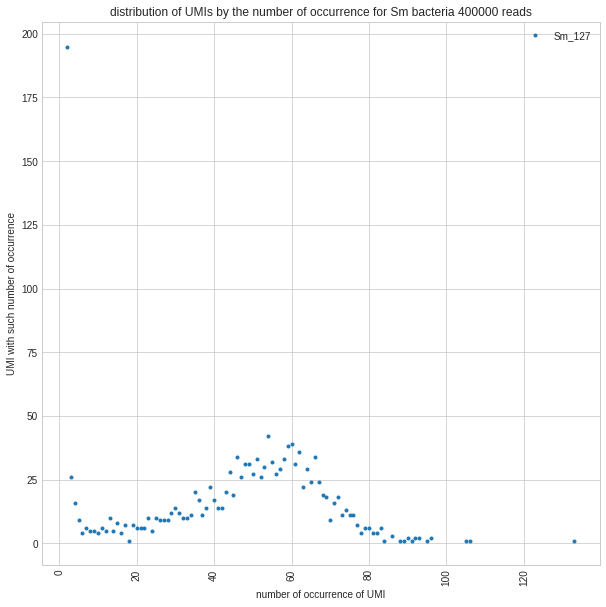

In [118]:
#plot the procent count


#rna_from_sample_table
#dna_from_string_table
import matplotlib.pyplot as plt 

#plotcodoncount(codonnames,rna_from_sample_table,'title')

wi=10
hi=10

width_in_inches = wi
height_in_inches = hi
#dots_per_inch = 70
plt.figure(figsize=(width_in_inches, height_in_inches))#,dpi=dots_per_inch)  

#plt.plot(umi_count_values,umi_count_values_count,'.', label = "")

#plt.plot(Sm_125_values,Sm_125_count,'.', label = "Sm_125")
#plt.plot(Sm_126_values,Sm_126_count,'.', label = "Sm_126")
plt.plot(Sm_127_values[1:],Sm_127_count[1:],'.', label = "Sm_127")
#plt.plot(Sm_128_values,Sm_128_count,'.', label = "Sm_128")

#plt.plot(Sm_125_values,Sm_125_count, label = "Sm_125")
#plt.plot(Sm_126_values,Sm_126_count, label = "Sm_126")
#plt.plot(Sm_127_values,Sm_127_count, label = "Sm_127")
#plt.plot(Sm_128_values,Sm_128_count,'.', label = "Sm_128")



plt.style.use('seaborn-whitegrid')
    # naming the x axis 
plt.xlabel('number of occurrence of UMI') 
    # naming the y axis 
plt.ylabel('UMI with such number of occurrence') 
    # giving a title to my graph 
plt.title('distribution of UMIs by the number of occurrence for Sm bacteria 400000 reads')
degrees = 90
plt.xticks(rotation=degrees)


#plt.tight_layout()
    # show a legend on the plot 
plt.legend() 
    # function to show the plot 
plt.show()
#plt.savefig("out.png")


True

In [121]:
sum([6681, 195, 26, 16, 9, 4, 6, 5, 5, 4, 6, 5, 10, 5, 8, 4, 7, 1, 7, 6, 6, 6, 10, 5, 10, 9, 9, 9, 12, 14, 12, 10, 10, 11, 20, 17, 11, 14, 22, 17, 14, 14, 20, 28, 19, 34, 26, 31, 31, 27, 33, 26, 30, 42, 32, 27, 29, 33, 38, 39, 31, 36, 22, 29, 24, 34, 24, 19, 18, 9, 16, 18, 11, 13, 11, 11, 7, 4, 6, 6, 4, 4, 6, 1, 3, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1])

8199

In [120]:
32794/53370

0.6144650552744988

In [122]:
6681/8199

0.8148554701792902

In [24]:
def diff_count(str1,str2):
    min_len=min(len(str1),len(str2))
    diff=0
    equal=0
    for i in range(0, min_len):
        if str1[i]!=str2[i]:
            diff+=1
        else:
            equal+=1
    return diff,equal

    

In [26]:
diff_count(Lf_1,Bc_1)

(40, 133)

In [56]:
arra=['dd','ff','g']
not 'dd' in arra
arra.index('g')

2

In [67]:
len(Counter(good_umi_values).keys())

43